# Books Recommender System Using Autoencoder for Feature Encoding



## Preprocessing (like original model)

In [1]:
# Importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv(
    'data/BX-Books.csv', 
    sep=";", on_bad_lines='skip',
    low_memory=False ,
    encoding='latin-1')

In [3]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [4]:
# after remove
books = books[['ISBN','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L']]

In [5]:
# Lets remane some wierd columns name
books.rename(columns={"Book-Title":'title',
                      'Book-Author':'author',
                     "Year-Of-Publication":'year',
                     "Publisher":"publisher",
                     "Image-URL-L":"image_url"},inplace=True)

In [6]:

users = pd.read_csv('data/BX-Users.csv', sep=";", on_bad_lines='skip',low_memory=False , encoding='latin-1')

In [7]:
# Lets remane some wierd columns name
users.rename(columns={"User-ID":'user_id',
                      'Location':'location',
                     "Age":'age'},inplace=True)

In [8]:
# Now load the third dataframe
ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=";", on_bad_lines='skip',low_memory=False , encoding='latin-1')

In [9]:
# Lets remane some wierd columns name
ratings.rename(columns={"User-ID":'user_id',
                      'Book-Rating':'rating'},inplace=True)

In [10]:
print(f'book dataframe {books.shape}\nusers dataframe {users.shape}\nratings dataframe {ratings.shape}')

book dataframe (271360, 6)
users dataframe (278858, 3)
ratings dataframe (1149780, 3)


In [11]:
# Lets store users who had at least rated more than 200 books
x = ratings['user_id'].value_counts() > 200
x = x[x]
y= x.index


In [12]:
ratings = ratings[ratings['user_id'].isin(y)]

In [13]:
ratings['user_id'].unique().shape

(899,)

# Join ratings with books

In [14]:
# Now join ratings with books by
# ISBN (International Standard Book Number)
ratings_with_books = ratings.merge(books, on='ISBN')

In [15]:
ratings_with_books.shape

(487671, 8)

In [16]:
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [17]:
number_rating.rename(columns={'rating':'num_of_rating'},inplace=True)

In [18]:
final_rating = ratings_with_books.merge(number_rating, on='title')

In [19]:
# Lets take those books which got at least 50 rating of user
final_rating = final_rating[final_rating['num_of_rating'] >= 50]

In [20]:
# lets drop the duplicates
final_rating.drop_duplicates(['user_id','title'],inplace=True)

In [21]:
final_rating.shape

(59850, 9)

# Encoder and training model

In [22]:
# Lets create a pivot table
book_pivot = final_rating.pivot_table(
    columns='user_id',
    index='title',
    values= 'rating'
    )

In [23]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [24]:
book_pivot.fillna(0, inplace=True)

In [25]:
book_pivot.head()

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0


# Building Autoencoder to encoder feature of movie

In [26]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
book_pivot_normalized = scaler.fit_transform(book_pivot)


Build the Autoencoder

In [28]:
book_pivot_normalized.shape[1] # number of user

888

In [29]:
input_dim = book_pivot_normalized.shape[1]
encoding_dim = 32 # reduce dimensionality to 32

input_layer = Input(shape=(input_dim,))
encoder = Dense(128, activation='relu')(input_layer)
encoder = Dense(64, activation='relu')(encoder)
encoder = Dense(encoding_dim, activation='relu')(encoder)

decoder = Dense(64, activation='relu')(encoder)
decoder = Dense(128, activation='relu')(decoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

In [34]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001, amsgrad=True)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=optimizer, loss='mean_squared_error')


In [35]:
# Train the Autoencoder
autoencoder.fit(book_pivot_normalized, book_pivot_normalized, epochs=50, batch_size=256, shuffle=True)

# Extract Reduced Features
encoder_model = Model(inputs=input_layer, outputs=encoder)
reduced_features = encoder_model.predict(book_pivot_normalized)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0148
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0147
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0149
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0147 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0148 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0148
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0149 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0148 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0146 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0147 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0149
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0148 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0147 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0146 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0146 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━

In [36]:
print("First elements of the reduced features:")
print(reduced_features[0])

First elements of the reduced features:
[0.         0.         0.         3.2254505  4.103446   0.5397127
 0.         3.4034038  0.         0.         0.         0.
 2.5253797  4.165374   6.1582785  0.         0.         0.
 1.7062505  1.6582135  2.69639    1.2204148  0.80308664 3.2806501
 0.         0.8056738  0.         2.235183   3.7228584  4.572162
 3.4129448  0.        ]


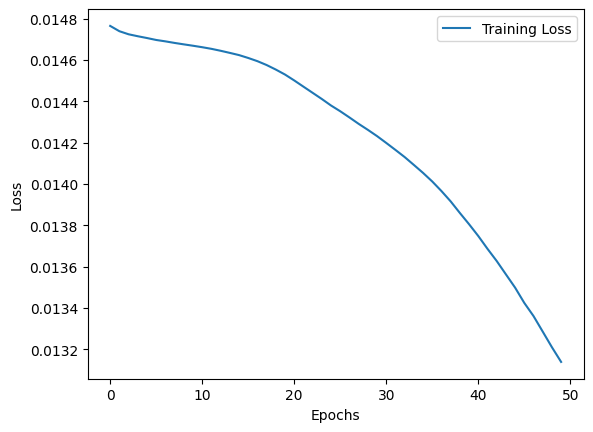

In [38]:
import matplotlib.pyplot as plt
# Vẽ biểu đồ loss của autoencoder
plt.plot(autoencoder.history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
reduced_features.shape

(742, 32)

In [40]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(
    metric='cosine', 
    algorithm='brute'
    )
knn.fit(reduced_features)

NearestNeighbors(algorithm='brute', metric='cosine')

In [41]:
# Function to recommend similar books
def recommend_books(book_id, n_recommendations=5):
    distances, indices = knn.kneighbors(
        [reduced_features[book_id]], 
        n_neighbors=n_recommendations+1
        )
    recommended_books = indices[0][1:]  # Exclude the first one as it is the book itself
    return recommended_books


In [42]:
# Example: Recommend 5 books similar to the book with ID 0
recommended_books = recommend_books(book_id=0, n_recommendations=5)
print("Recommended books:", recommended_books)

Recommended books: [576 282 402 216 726]


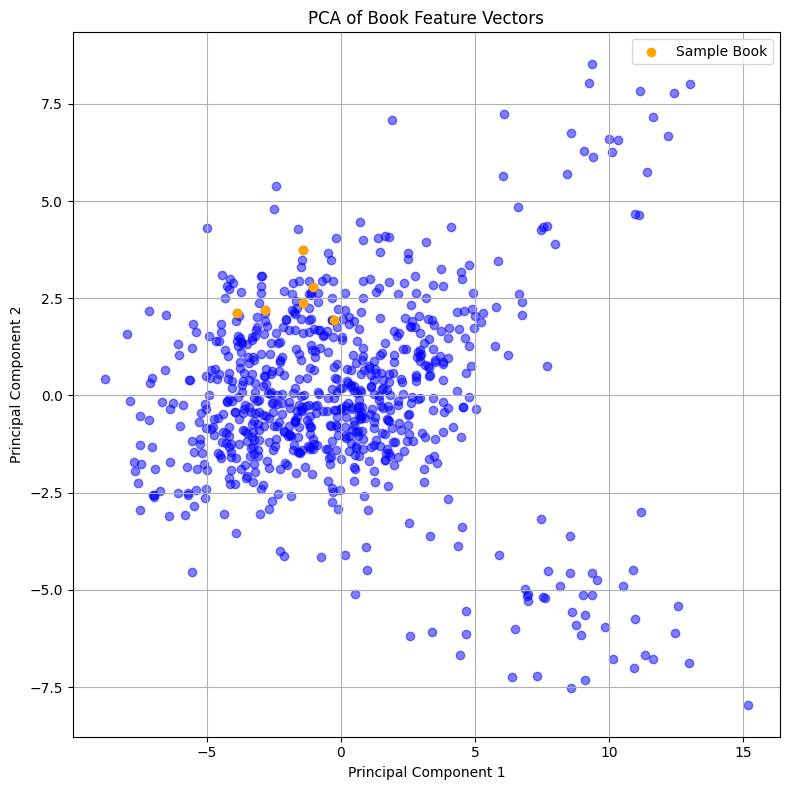

In [43]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
book_pivot_pca = pca.fit_transform(reduced_features)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(book_pivot_pca, index=book_pivot.index, columns=['PC1', 'PC2'])

# Sample book ID (change as needed)
sample_book_id = 700

# Find similar books
similar_books_indices = recommend_books(book_id=sample_book_id, n_recommendations=5)

# Plotting the PCA results
plt.figure(figsize=(8, 8))

# Plot all points in blue
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5, color='blue')

# Highlight the sample book in orange
plt.scatter(pca_df['PC1'].iloc[sample_book_id], pca_df['PC2'].iloc[sample_book_id], color='orange', label='Sample Book')

# Highlight the similar books in orange
for idx in similar_books_indices:
    plt.scatter(pca_df['PC1'].iloc[idx], pca_df['PC2'].iloc[idx], color='orange')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Book Feature Vectors')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

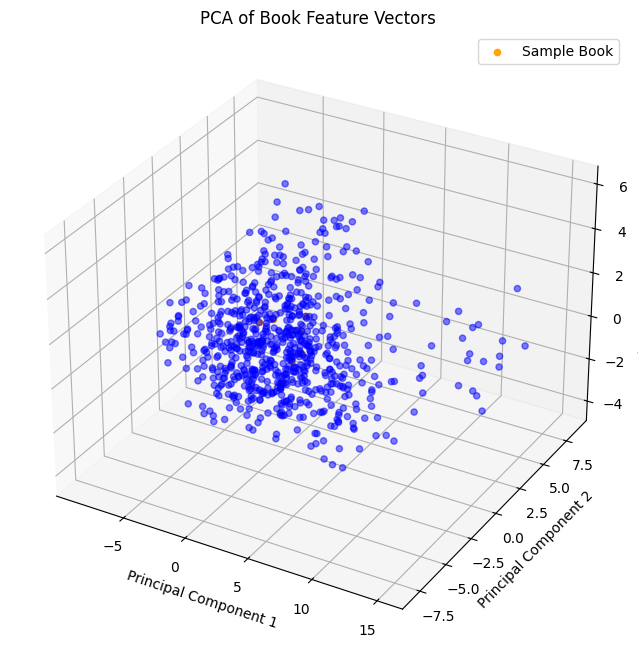

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
book_pivot_pca = pca.fit_transform(reduced_features)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(book_pivot_pca, index=book_pivot.index, columns=['PC1', 'PC2', 'PC3'])

# Sample book ID (change as needed)
sample_book_id = 700

# Find similar books
similar_books_indices = recommend_books(book_id=sample_book_id, n_recommendations=5)

# Plotting the PCA results in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot all points in blue
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], alpha=0.5, color='blue')

# Highlight the sample book in orange
ax.scatter(pca_df['PC1'].iloc[sample_book_id], pca_df['PC2'].iloc[sample_book_id], pca_df['PC3'].iloc[sample_book_id], color='orange', label='Sample Book')

# Highlight the similar books in orange
for idx in similar_books_indices:
    ax.scatter(pca_df['PC1'].iloc[idx], pca_df['PC2'].iloc[idx], pca_df['PC3'].iloc[idx], color='orange')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of Book Feature Vectors')
ax.legend()
plt.show()

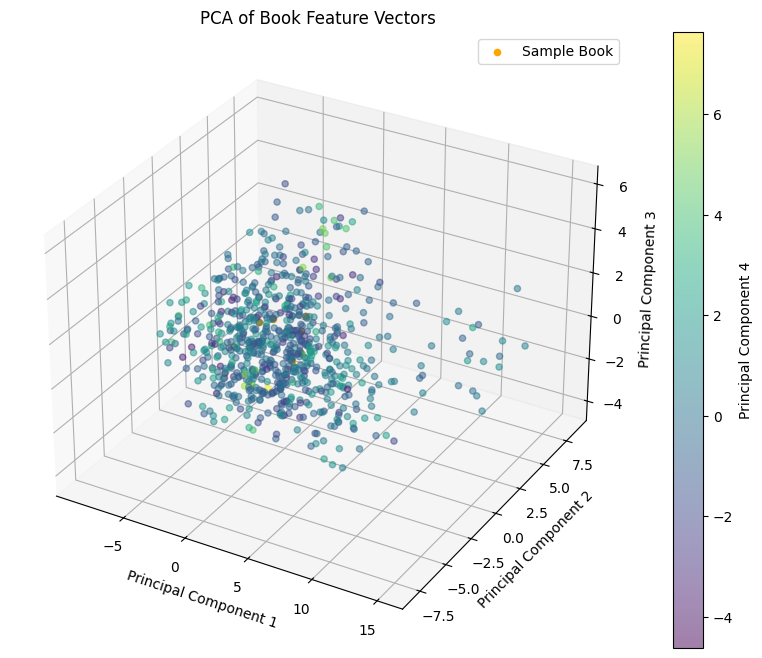

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Perform PCA to reduce to 4 dimensions
pca = PCA(n_components=4)
book_pivot_pca = pca.fit_transform(reduced_features)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(book_pivot_pca, index=book_pivot.index, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Sample book ID (change as needed)
sample_book_id = 700

# Find similar books
similar_books_indices = recommend_books(book_id=sample_book_id, n_recommendations=5)

# Plotting the PCA results in 3D with color representing the 4th dimension
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot all points in blue with color representing the 4th dimension
sc = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['PC4'], cmap='viridis', alpha=0.5)

# Highlight the sample book in orange
ax.scatter(pca_df['PC1'].iloc[sample_book_id], pca_df['PC2'].iloc[sample_book_id], pca_df['PC3'].iloc[sample_book_id], color='orange', label='Sample Book')

# Highlight the similar books in orange
for idx in similar_books_indices:
    ax.scatter(pca_df['PC1'].iloc[idx], pca_df['PC2'].iloc[idx], pca_df['PC3'].iloc[idx], color='orange')

# Add color bar to show the 4th dimension
cbar = plt.colorbar(sc)
cbar.set_label('Principal Component 4')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of Book Feature Vectors')
ax.legend()
plt.show()

In [46]:
import numpy as np

def recommend_book_knn(book_id, k=6):
    # Ensure the model is defined and trained
    if 'knn' not in globals():
        raise NameError("The KNN model is not defined. Please define and train the model before calling this function.")
    
    # Find similar books
    distances, indices = knn.kneighbors([reduced_features[book_id]], n_neighbors=k)
    
    book_name = book_pivot.index[book_id]
    similar_books = []
    for i in range(1, len(indices[0])):  # Start from 1 to exclude the book itself
        similar_book_index = indices[0][i]
        similar_book_name = book_pivot.index[similar_book_index]
        distance = np.linalg.norm(reduced_features[book_id] - reduced_features[similar_book_index])
        similar_books.append((similar_book_name, distance))
    
    total_distance = 0
    print(f"Books similar to '{book_name}':")
    for book, distance in similar_books:
        total_distance += distance
        print(f"{book} - distance {distance:.4f}")
    print(f"Average distance: {total_distance / len(similar_books):.4f}")

# Example usage
recommend_book_knn(book_id=0, k=6)

Books similar to '1984':
The Hitchhiker's Guide to the Galaxy - distance 2.4636
Into the Wild - distance 3.3099
Presumed Innocent - distance 4.1763
Fried Green Tomatoes at the Whistle Stop Cafe - distance 2.9541
White Oleander : A Novel (Oprah's Book Club) - distance 2.7318
Average distance: 3.1271
